# EDA Q1: Does the distance between a house and downtown Seattle affect house price?

* **sqft_livingsquare** -  footage of the home
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 1. Import Cleaned Data

In [99]:
data = pd.read_csv('csv_files/added_features_data.csv',index_col=0)
cleaned_data = data

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19087 entries, 0 to 19086
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              19087 non-null  float64
 1   bedrooms           19087 non-null  int64  
 2   bathrooms          19087 non-null  float64
 3   sqft_living        19087 non-null  int64  
 4   sqft_lot           19087 non-null  int64  
 5   floors             19087 non-null  float64
 6   sqft_above         19087 non-null  int64  
 7   lat                19087 non-null  float64
 8   long               19087 non-null  float64
 9   sqft_living15      19087 non-null  int64  
 10  sqft_lot15         19087 non-null  int64  
 11  total_sqft         19087 non-null  int64  
 12  total_sqft_inside  19087 non-null  float64
 13  age_when_sold      19087 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 2.2 MB


In [73]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long,sqft_living15,sqft_lot15,total_sqft,total_sqft_inside,age_when_sold
0,538000.0,3,2.25,2570,7242,2.0,2170,47.7210,-122.319,1690,7639,9812,2570.0,63
1,571000.0,4,2.00,2750,7807,1.5,2250,47.7168,-122.287,1510,7807,10557,2750.0,98
2,315000.0,3,1.00,960,6634,1.0,960,47.7264,-122.310,1570,7203,7594,960.0,62
3,382500.0,2,1.00,1190,4440,1.0,1190,47.7135,-122.287,1060,5715,5630,1190.0,33
4,425000.0,3,1.75,2500,6840,1.0,1300,47.7222,-122.320,1580,8691,9340,2500.0,57


In [74]:
# dataframe for latitude and longitude for each house, and price
df_house_location = data[['price','lat','long']]

df_house_location.head()

,price,lat,long
0,538000.0,47.7210,-122.319
1,571000.0,47.7168,-122.287
2,315000.0,47.7264,-122.310
3,382500.0,47.7135,-122.287
4,425000.0,47.7222,-122.320


## 2. Remove Outliers

In [75]:
df_house_location = df_house_location[df_house_location['price'] <= 2000000]

## 3. Calculate Distance Between House and Downtown Seattle

In [76]:
from haversine import haversine, Unit

In [77]:
# latitude and longitude of downtown seattle
downtown_seattle_location = (47.608013, -122.335167)

# latitude and longitude of each house in the cleaned dataset
house_location = list(zip(data['lat'],data['long']))

# calculate distance in miles between each house and downtown seattle
distance = pd.DataFrame({'distance':[round(haversine(downtown_seattle_location, house, unit='mi'),2) 
                                     for house in house_location]})
distance.head()

,distance
0,7.84
1,7.84
2,8.26
3,7.63
4,7.92


In [78]:
# concat house and distance into one dataframe
house_distance = pd.concat([df_house_location, distance],axis=1)
house_distance.head()

,price,lat,long,distance
0,538000.0,47.7210,-122.319,7.84
1,571000.0,47.7168,-122.287,7.84
2,315000.0,47.7264,-122.310,8.26
3,382500.0,47.7135,-122.287,7.63
4,425000.0,47.7222,-122.320,7.92


## 3. Check Linearity Assumption

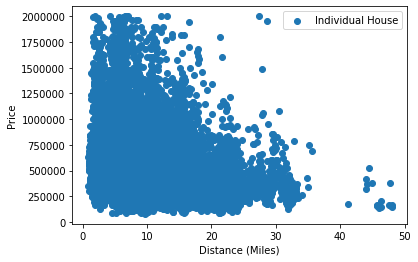

In [79]:
plt.scatter(house_distance['distance'],house_distance['price'],label='Individual House')
plt.xlabel('Distance (Miles)')
plt.ticklabel_format(style='plain')
plt.ylabel('Price')
plt.legend()
plt.show()

## 4. Check Normality for Variables

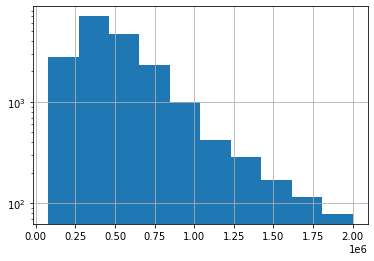

In [80]:
house_distance['price'].hist().set_yscale('log')

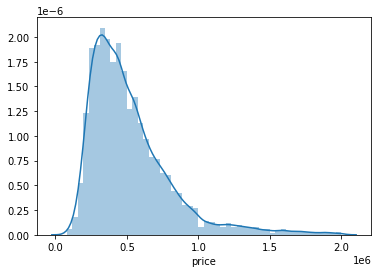

In [81]:
sns.distplot(house_distance['price']);

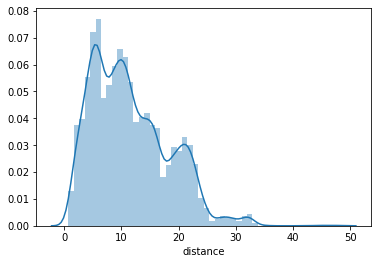

In [82]:
sns.distplot(house_distance['distance']);

## 5. Simple Linear Regression

In [83]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [84]:
f = 'price~distance'

model = ols(formula=f,data=house_distance).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     2046.
Date:                Fri, 24 Jul 2020   Prob (F-statistic):               0.00
Time:                        00:29:40   Log-Likelihood:            -2.6347e+05
No. Observations:               18904   AIC:                         5.269e+05
Df Residuals:                   18902   BIC:                         5.270e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    6.77e+05   3980.140    170.096      0.000    6.69e+05    6.85e+05
distance   -1.345e+04    297.300    -45.232      0.000    -1.4e+04   -1.29e+04
==============================================================================
Omnibus:                     6590.430   Durbin-Watson:                   1.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24474.679
Skew:                           1.738   Prob(JB):                         0.00
Kurtosis:                       7.358   Cond. No.                         26.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

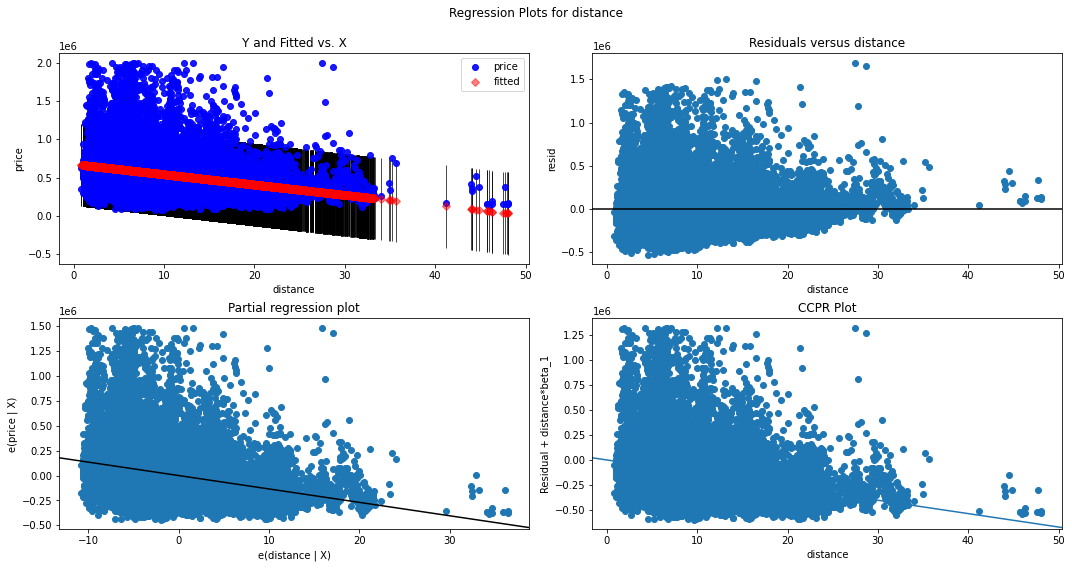

In [85]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'distance',fig=fig)
plt.show()

## 6. Normality Check

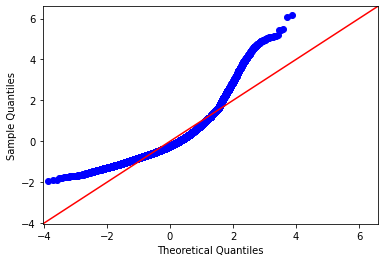

In [86]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)
fig.show()

In [87]:
house_distance

,price,lat,long,distance
0,538000.0,47.7210,-122.319,7.84
1,571000.0,47.7168,-122.287,7.84
2,315000.0,47.7264,-122.310,8.26
3,382500.0,47.7135,-122.287,7.63
4,425000.0,47.7222,-122.320,7.92
...,...,...,...,...
19082,NaN,NaN,NaN,4.66
19083,NaN,NaN,NaN,4.99
19084,1950000.0,47.6209,-122.237,4.66
19085,NaN,NaN,NaN,5.13


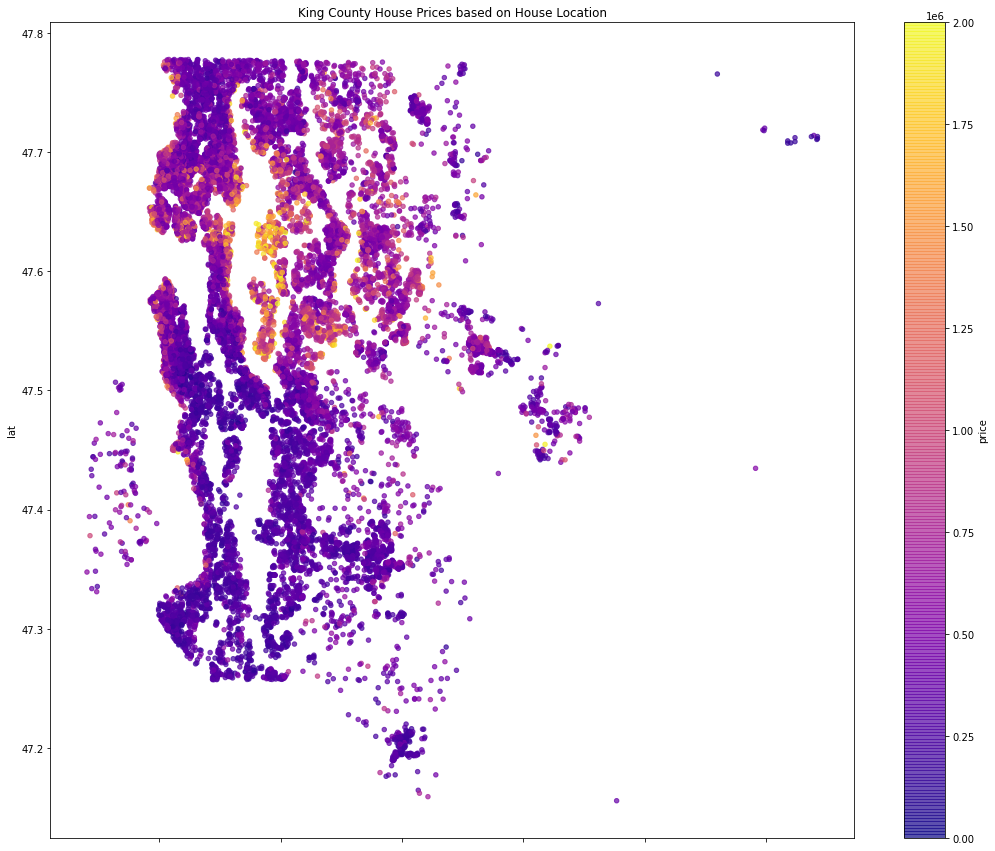

In [98]:
ax = house_distance.plot.scatter('long','lat',c='price',alpha=0.7,figsize=(18,15),vmin = 0, vmax=2000000,
                                 cmap='plasma')
plt.title('King County House Prices based on House Location')
plt.savefig('images/EDA_1.png')
plt.show();

# Interpretation

* There is no relationship between price and distance between the home and downtown seattle.
* Normality for each variables are very skewed.
* Normality for the residuals is very curved and distorted meaning the residuals hae a non-normal distribiution.
* Low R-squared in which there is no good fit.
* There is heteroscedasticity in the data indicating variability is unequal across the distance values.

A lot more preprocessing can be done and this can definitely be explored more. After a quick model, this was definitely not a good model with an R-squared of 0.098.